<a href="https://colab.research.google.com/github/burjoawl/Burrs_Portofolio/blob/main/Cosine%20Similarity/Cosine_Similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Query SQL

```
SELECT
  sale_dollars
FROM
  bigquery-public-data.iowa_liquor_sales.sales
LIMIT
  5000
```

# Soal

## Problem 1

Salah satu ruang lingkup Natural Language Processing (NLP) adalah mengukur kesamaan konteks antar kalimat. Untuk mengetahui dua kalimat memiliki konteks yang sama atau tidak, kita mengukurnya dengan *cosine similarity*. *Cosine similarity* sejatinya mengukur 'jarak' antar dua vektor yang mana vektor-vektor tersebut berisikan angka-angka, sehingga kita perlu menerjemahkan kalimat menjadi list angka (encoding). Ada banyak metode encoding yang dapat digunakan untuk menerjemahkan kalimat ke angka, salah satunya adalah dengan menghitung frekuensi kemunculan kata pada setiap kalimat.


---


Kalimat 1: Julie loves me more than Linda loves me

Kalimat 2: Jane likes me more than Julie loves me


---


Berikut tabel yang berisikan frekuensi kata yang muncul pada kedua kalimat:

| Kata | Kalimat 1 | Kalimat 2 |
| ----------- | ----------- | ----------- |
| me | 2 | 2|
| Jane | 0 | 1 |
| Julie | 1 | 1 |
|Linda	|1	|0|
|likes	|0	|1|
|loves	|2	|1|
|more	|1	|1|
|than	|1	|1|

Buatlah vektor yang merupakan representasi masing-masing kalimat berdasarkan tabel di atas dan hitung cosine similarity antar kedua vektor. Kemudian jawab pertanyaan berikut di markdown:

a. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?

b. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?

c. Mengapa cosine similarity harus melibatkan vektor bukan matriks?



## Problem 2

Dataset Description
- Pada graded challenge ini, data diakses menggunakan `bigquery-public-data` pada Google Cloud Big Query.
- Buka Google Cloud Platform, masuk ke BigQuery, lalu buka tab `bigquery-public-data` atau klik link [berikut](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=samples&page=dataset&_ga=2.245085957.1471931019.1642739417-486643658.1638156099)  atau link [berikut](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=iowa_liquor_sales&t=sales&page=table) untuk langsung menuju ke tabel.

Perhatikan petunjuk penggunaan dataset!
1. Gunakan tabel `sales` pada dataset `iowa_liquor_sales`.
2. Buatlah query dengan kriteria sebagai berikut:
  - Pilih HANYA kolom `sale_dollars`
  - Batasi jumlah data maksimal 5000

3. Simpan dataset dalam bentuk csv, dengan nama `h8dsft_P0LC3_<nama-students>.csv`.
4. Salin query yang telah dibuat di Google Cloud Platform, tulislah pada bagian atas notebook!

5. Tampilkan `head` dan `tail` dari dataset pada notebook!

**Clue** Untuk mengetahui adanya anomali, kamu bisa menggunakan metode extreme value analysis. Untuk melakukan pengecekan anomali/outlier, lakukan langkah-langkah di bawah ini:

1. Lakukan perhitungan central tendency (mean, median, modus) terhadap data sebelum dideteksi adanya anomali.
2. Cek skewness data untuk mengetahui apakah data terdistribusi normal atau tidak.
3. Lakukan pengolahan data dengan menggunakan extreme value analysis.
4. Buat variabel baru yang menyimpan data yang sudah dibuang data anomalinya.

**PERTANYAAN**

**Silahkan jawab pertanyaan-pertanyaan di bawah ini berdasarkan hasil yang kamu peroleh dan tulis pada bagian hasil:**

1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!
2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!
3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

# Import Pustaka

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

# Data Loading

## Problem 1

Kalimat 1: Julie loves me more than Linda loves me

Kalimat 2: Jane likes me more than Julie loves me

In [2]:
# Membuat kalimat menjadi array yang akan digunakan untuk pengerjaan nanti menggunakan numpy
Kalimat_1 = np.array([2, 0, 1, 1, 0, 2, 1 ,1])
Kalimat_2 = np.array ([2, 1, 1, 0, 1, 1 ,1 ,1])

## Problem 2


In [4]:
# Membaca file csv menggunakan pandas
df = pd.read_csv('https://raw.githubusercontent.com/burjoawl/Burrs_Portofolio/main/Assignments/Cosine%20Similarity/Cosine%20Similarity.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_dollars  5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [5]:
# Memunculkan nilai 5 teratas
df.head(5)

,sale_dollars
0,7.40
1,7.40
2,7.40
3,8.45
4,990.00


In [6]:
# Memunculkan nilai 5 terbawah
df.tail(5)

,sale_dollars
4995,63.00
4996,62.28
4997,62.28
4998,62.28
4999,63.00


# Mathematical Calculations

## Problem 1

### Cosine Similarity

Mengerjakan rumus cosine similarity

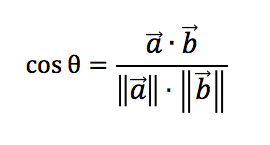

dimana:

a = Kalimat 1

b = Kalimat 2

In [7]:
cosine_sim = Kalimat_1 @ Kalimat_2 /(np.linalg.norm(Kalimat_1) * np.linalg.norm(Kalimat_2))

print('Dot Product:', Kalimat_1 @ Kalimat_2)
print('Cosine Similarity:',cosine_sim.round(4))

Dot Product: 9
Cosine Similarity: 0.8216


### Grafik Panah

Membuat data visual dari cosine similarity

Text(0, 0.5, 'Y')

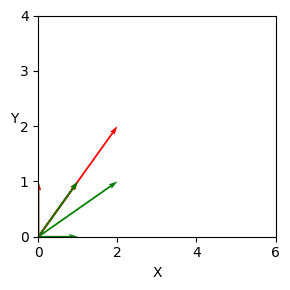

In [8]:
plt.rcParams["figure.figsize"] = [3, 3]
plt.rcParams["figure.autolayout"] = True

plt.figure()
ax = plt.gca()
ax.quiver([0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0], Kalimat_1, Kalimat_2, angles='xy', scale_units='xy', scale=1, color=['red', 'green'])
ax.set_xlim (0,6)
ax.set_ylim (0, 4)

ax.set_xlabel('X')
ax.set_ylabel('Y', rotation = 0)


## Problem 2

### Central Tendency

Mencari nilai Mean, Median, Modus sebelum melakukan pengecekan anomali/outlier

In [9]:
# Mean

Nilai_Mean = df['sale_dollars'].mean()
print ('Nilai Mean adalah: ', Nilai_Mean.round(2))

# Median
Nilai_Median = df['sale_dollars'].median()
print ('Nilai Median adalah: ', Nilai_Median)

# Modus
Nilai_Modus = df['sale_dollars'].mode()
print ('Nilai Modus adalah: ', Nilai_Modus)

Nilai Mean adalah:  227.25
Nilai Median adalah:  129.6
Nilai Modus adalah:  0    94.2
Name: sale_dollars, dtype: float64


### Skewness

Berdasarkan nilai skewness, nilainya cukup tinggi, sehingga dapat ditarik kesimpulan bahwa tidak terdistribusi secara normal

Nilai Skewness adalah:  18.39


<Axes: xlabel='sale_dollars', ylabel='Count'>

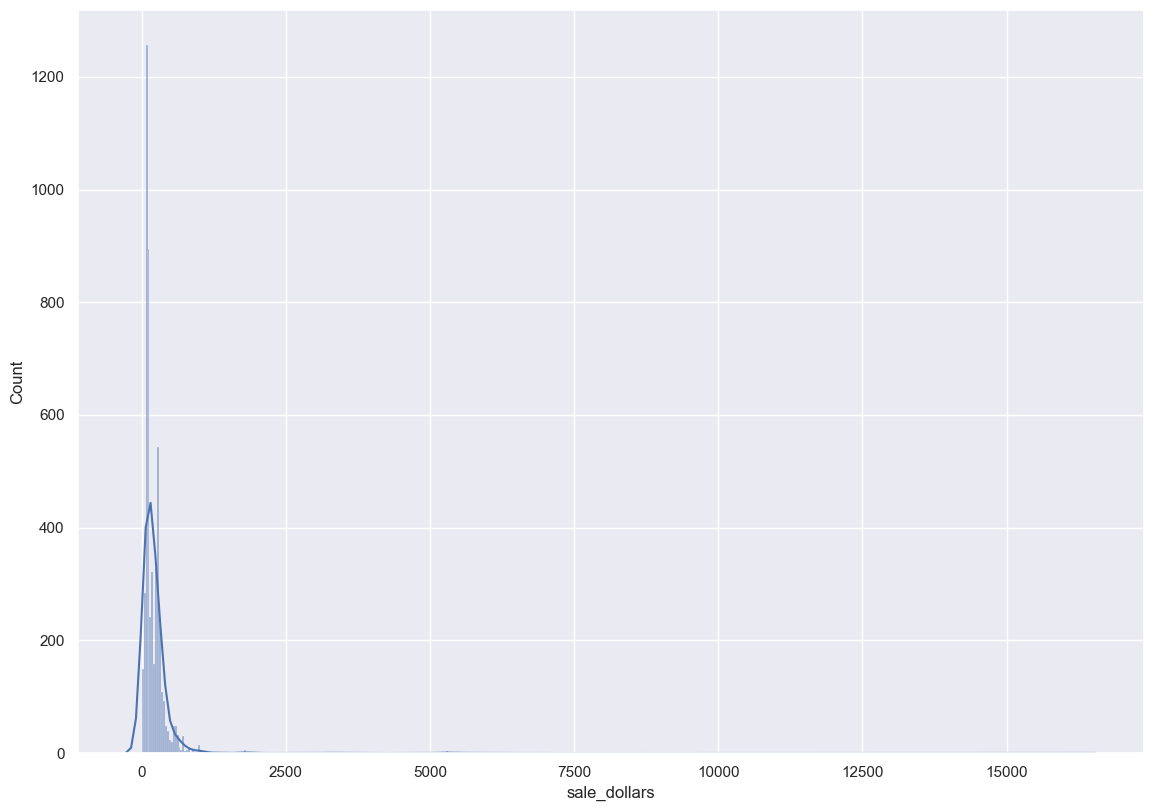

In [10]:
Nilai_Skewness = df['sale_dollars'].skew()
print ('Nilai Skewness adalah: ', Nilai_Skewness.round(2))

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(df['sale_dollars'], bins=500, kde=True)


### Extreme Value Analysis

In [11]:
# Membuat nilai 25 quantil yang disebut Q1 dan 75 quantil yang disebut Q3
Q1 = df['sale_dollars'].quantile(0.25)
Q3 = df['sale_dollars'].quantile(0.75)
print ('Nilai Q1: ', Q1)
print ('Nilai Q3: ', Q3)

# Membuat nilai IQR, dari Q3 - Q1
IQR = Q3 - Q1
print ('Nilai IQR: ', IQR.round(2))

# Membuat nilai batas bawah dengan rumus Q1 - (IQR * 1.5)
BatasBawah = Q1 - (IQR * 1.5)

# Membuat nilai batas atas dengan rumus Q3 + (IQR * 1.5)
BatasAtas = Q3 + (IQR * 1.5)

print ('Nilai Batas Bawah: ', BatasBawah)
print ('Nilai Batas Atas: ', BatasAtas)

Nilai Q1:  94.2
Nilai Q3:  270.0
Nilai IQR:  175.8
Nilai Batas Bawah:  -169.50000000000006
Nilai Batas Atas:  533.7


In [12]:
# Melihat data yang hilang
DataHilang = df[(df['sale_dollars'] < BatasBawah) | (df['sale_dollars'] > BatasAtas)]
DataHilang

,sale_dollars
4,990.00
8,1440.48
9,1259.76
26,561.36
27,597.36
...,...
1795,566.88
1799,541.32
1800,568.44
1802,1799.04


In [13]:
# Menghilangkan angka-angka yang berada diluar batas bawah maupun batas atas
df_IQR = df[(df['sale_dollars'] > BatasBawah) & (df['sale_dollars']< BatasAtas)]

# Menampilkan jumlah nilai, terlihat yang hilang terdapat 265 data
print ('Nilai sebelum: ', df.shape) #Nilai sebelum
print ('Nilai setelah: ', df_IQR.shape) #Nilai setelah

Nilai sebelum:  (5000, 1)
Nilai setelah:  (4736, 1)


In [14]:
# Menghitung persen yang hilang dari data awal
PersenHilang = (len (df.index) - len(df_IQR.index)) / len (df.index) * 100

print ('Persen yang hilang adalah: ', round(PersenHilang, 4), '%')

Persen yang hilang adalah:  5.28 %


Nilai Skewness : 0.87


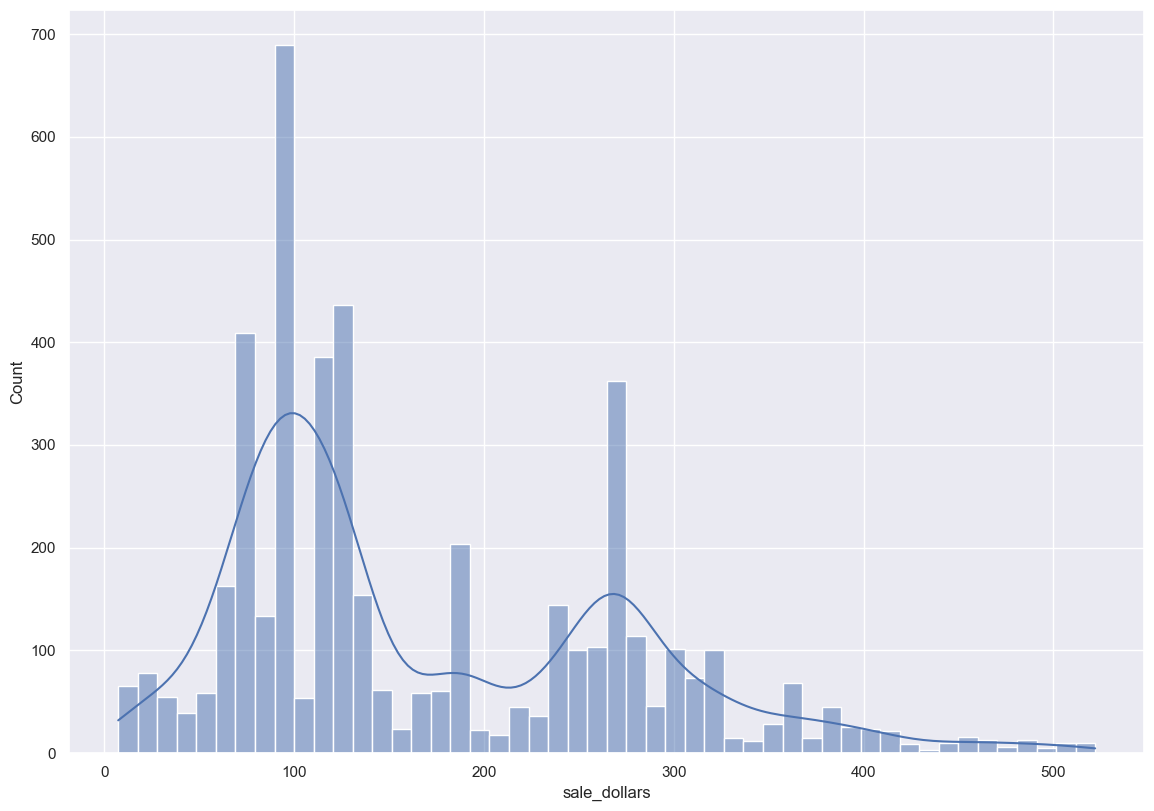

In [15]:
# Mengecek ulang setelah outlier dihilangkan
print ('Nilai Skewness :', df_IQR['sale_dollars'].skew().round(decimals=2))

sns.histplot(df_IQR['sale_dollars'], bins=50, kde=True);

In [16]:
# Variabel baru yang menyimpan data yang sudah dibuang data anomalinya
Variabel_Baru = df_IQR
Variabel_Baru

,sale_dollars
0,7.40
1,7.40
2,7.40
3,8.45
5,162.00
...,...
4995,63.00
4996,62.28
4997,62.28
4998,62.28


# Hasil

## Problem 1

a. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?
    
  Berdasarkan hasil nilai `Cosine Similarity`, bahwa kesamaan antara Kalimat 1 dan Kalimat 2 hanya 82.16%, artinya kalimat tersebut lumayan mirip


---


b. Jika meninjau dua buah vektor dan dihitung cosine similaritynya (cos theta), jelaskan secara singkat, jelas, padat apa makna cosine similarity yang bernilai 0 dan 1 (tinjau dari posisi dua vektor di koordinat kartesian)?

  Berdasarkan hasil grafik panah yang menunjukkan Kalimat 1 dan Kalimat 2, terlihat juga bahwa  `Cosine Similarity` adalah sudut yang terbentuk antara kedua panah tersebut


---


c. Mengapa cosine similarity harus melibatkan vektor bukan matriks?

  Cosine similarity melibatkan vektor karena saat melakukan plot grafik menggunakan vektor yang memiliki arah, sedangkan matriks tidak

## Problem 2

a. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!

Nilai Central Tendencynya antara lain:
- Mean = 226.37
- Median = 123.12
- Modus = 94.2

Berdasarkan nilai Mean dengan Median, datanya sangat tersebar, telihat dari jauhnya nilai Mean dengan Median, untuk nilai modus yang paling banyak muncul adalah nilai 94.2.


---

b. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!

Nilai skewness dari data awal atau yang sebelum dihilangkan anomatinya, datanya sangat tinggi skewnessnya, dengan nilai 26.99, dari grafik skewness juga terlihat tidak terdistribusi dengan baik.


---


c. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

Teknik yang dipakai dalam melakukan Extreme Value Analysis adalah teknik tukey's rule, karena datanya tidak simetris, sedangkan apabila ingin menggunakan zscore, data yang dipakai harus terdistribusi secara simetris.

